In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess

In [16]:
df = pd.read_csv('Paths.csv')

path2script = "Markov Chain Attribution Modeling.R"

cmd = ['Rscript', path2script]

subprocess.call(cmd)

1

In [17]:
markov = pd.read_csv('Markov - Output.csv')
markov = markov[['channel_name', 'total_conversions']]
markov.columns = ['Channel', 'Conversion']

markov.head()

,Channel,Conversion
0,1,1196
1,20,1196
2,12,0
3,14,0
4,13,0


## Markov Attribution Model

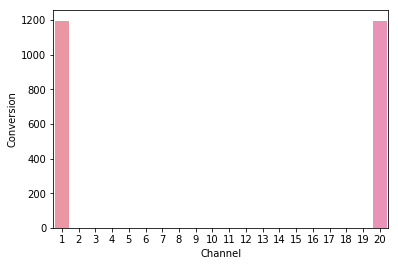

In [3]:
sns.barplot(x = markov['Channel'], y = markov['Conversion'], data = markov)

## First Touch Attribution Model

In [4]:
df['First Touch'] = df['Path'].map(lambda x: x.split(' > ')[0])
df_ft = pd.DataFrame()
df_ft['Channel'] = df['First Touch']
df_ft['Attribution'] = 'First Touch'
df_ft['Conversion'] = 1
df_ft = df_ft.groupby(['Channel', 'Attribution']).sum().reset_index()

In [5]:
df_ft.head()

,Channel,Attribution,Conversion
0,1,First Touch,994
1,10,First Touch,284
2,11,First Touch,256
3,12,First Touch,161
4,13,First Touch,128


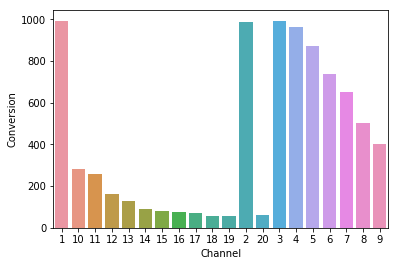

In [6]:
sns.barplot(x = df_ft['Channel'], y = df_ft['Conversion'], data = df_ft)

## Last Touch Attribution Model

In [7]:
df['Last Touch'] = df['Path'].map(lambda x: x.split(' > ')[-1])
df_lt = pd.DataFrame()
df_lt['Channel'] = df['Last Touch']
df_lt['Attribution'] = 'Last Touch'
df_lt['Conversion'] = 1
df_lt = df_lt.groupby(['Channel', 'Attribution']).sum().reset_index()

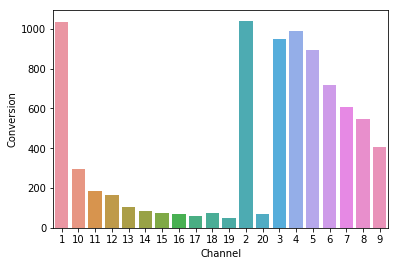

In [8]:
sns.barplot(x = df_lt['Channel'], y = df_lt['Conversion'], data = df_lt)

## Linear Attribution Model

In [9]:
channel = []
conversion = []

for i in df.index:
    for j in df.at[i, 'Path'].split(' > '):
        channel.append(j)
        conversion.append(1/len(df.at[i, 'Path'].split(' > ')))
        
lin_att_df = pd.DataFrame()
lin_att_df['Channel'] = channel
lin_att_df['Attribution'] = 'Linear'
lin_att_df['Conversion'] = conversion
lin_att_df = lin_att_df.groupby(['Channel', 'Attribution']).sum().reset_index()

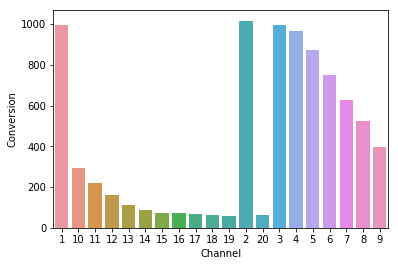

In [10]:
sns.barplot(x = lin_att_df['Channel'], y = lin_att_df['Conversion'], data = lin_att_df)

## Merge All Models

In [11]:
df_total_attr = pd.concat([df_ft, df_lt, lin_att_df, markov])
df_total_attr['Channel'] = df_total_attr['Channel'].astype(int)
df_total_attr.sort_values(by = 'Channel', ascending = True, inplace = True)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


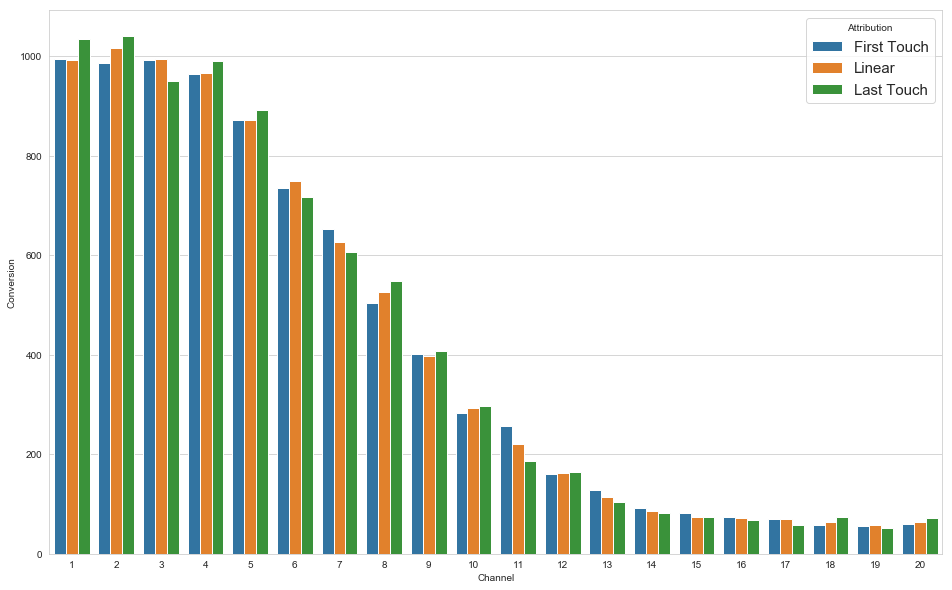

In [12]:
sns.set_style('whitegrid')
plt.rc('legend', fontsize = 15)
fig, ax = plt.subplots(figsize=(16, 10))

sns.barplot(x = 'Channel', y = 'Conversion', hue = 'Attribution', data = df_total_attr)
plt.show();

## Total Transition Matrix